Train on 162 samples, validate on 18 samples
Epoch 1/50
162/162 [==============================] - 5s 31ms/step - loss: 0.6349 - acc: 0.6914 - val_loss: 0.7743 - val_acc: 0.6111

Epoch 00001: val_acc improved from -inf to 0.61111, saving model to weights_cnn_model4_12.h5
Epoch 2/50
162/162 [==============================] - 4s 27ms/step - loss: 0.6179 - acc: 0.7407 - val_loss: 0.7939 - val_acc: 0.6667

Epoch 00002: val_acc improved from 0.61111 to 0.66667, saving model to weights_cnn_model4_12.h5
Epoch 3/50
162/162 [==============================] - 4s 27ms/step - loss: 0.6007 - acc: 0.7037 - val_loss: 0.7132 - val_acc: 0.7222

Epoch 00003: val_acc improved from 0.66667 to 0.72222, saving model to weights_cnn_model4_12.h5
Epoch 4/50
162/162 [==============================] - 4s 27ms/step - loss: 0.6154 - acc: 0.7099 - val_loss: 0.7966 - val_acc: 0.5556

Epoch 00004: val_acc did not improve from 0.72222
Epoch 5/50
162/162 [==============================] - 4s 27ms/step - loss: 0.6007 - 

162/162 [==============================] - 5s 28ms/step - loss: 0.5091 - acc: 0.7654 - val_loss: 1.3690 - val_acc: 0.6667

Epoch 00044: val_acc did not improve from 0.72222
Epoch 45/50
162/162 [==============================] - 5s 28ms/step - loss: 0.5140 - acc: 0.7531 - val_loss: 0.8758 - val_acc: 0.7222

Epoch 00045: val_acc did not improve from 0.72222
Epoch 46/50
162/162 [==============================] - 5s 28ms/step - loss: 0.4309 - acc: 0.8210 - val_loss: 1.0996 - val_acc: 0.7222

Epoch 00046: val_acc did not improve from 0.72222
Epoch 47/50
162/162 [==============================] - 5s 28ms/step - loss: 0.4355 - acc: 0.8025 - val_loss: 1.1535 - val_acc: 0.7778

Epoch 00047: val_acc improved from 0.72222 to 0.77778, saving model to weights_cnn_model4_12.h5
Epoch 48/50
162/162 [==============================] - 5s 28ms/step - loss: 0.5075 - acc: 0.7284 - val_loss: 1.2242 - val_acc: 0.7778

Epoch 00048: val_acc did not improve from 0.77778
Epoch 49/50
162/162 [====================

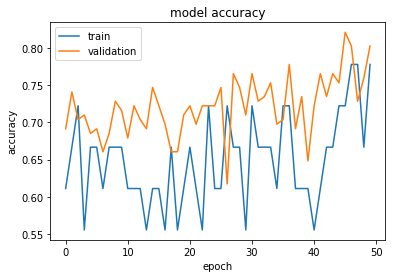

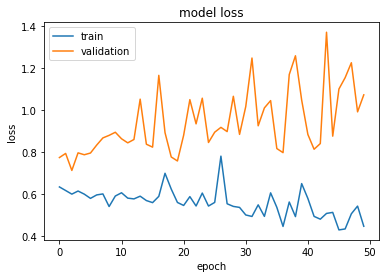

{0: 0.9270833333333334}
{0: 0.9270833333333334, 1: 0.967032967032967}
{0: 0.9270833333333334, 1: 0.967032967032967, 2: 0.9733333333333334}


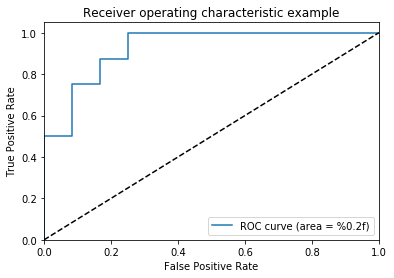

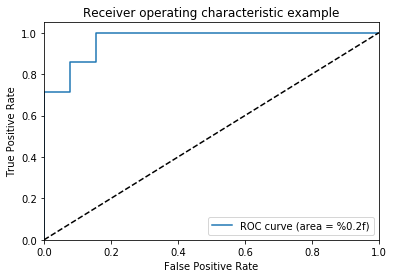

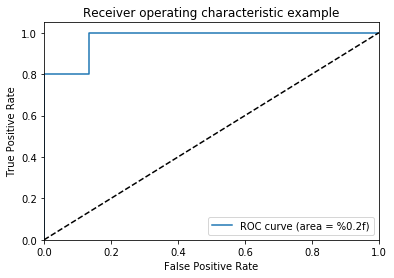

In [4]:
#from numpy.random import seed
#seed(1)
#from tensorflow import set_random_seed
#set_random_seed(2)

import numpy as np
import tensorflow as tf
import random as rn
import os
os.environ['PYTHONHASHSEED']='0'
#setting the seed nupy generator random number
np.random.seed(18)
#setting the seed for python random numbers
rn.seed(19)
#setting the seed for tensorflow
tf.set_random_seed(20)
from keras import backend as k

#force tensorflow to use a single thread
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
k.set_session(sess)



from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pickle
from keras.callbacks import ModelCheckpoint
import sklearn
from sklearn.metrics import roc_curve, auc
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob
from keras.preprocessing.image import ImageDataGenerator

import keras 
from keras.models import Sequential
from keras.callbacks import TensorBoard
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard

import matplotlib.pyplot as plt
import time


NAME = "CNN-kaggel-dataset-50epochs-2dropout-4cov2d-x200-30%split-184_42_64-7x7-no-dense"

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))




pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

X_test = X_test/255.0


# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(y, num_classes=3)
y_test= keras.utils.to_categorical(y_test, num_classes=3)



model = Sequential()

model.add(Conv2D(560, (3, 3), activation ='relu', input_shape=(200, 200, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(280, (3, 3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(140, (3, 3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Conv2D(70, (3, 3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.45))
model.add(Conv2D(32, (3, 3), strides = 1, activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(32, activation ='relu'))

#model.add(Dropout(0.2))
model.add(Dense(3, activation ='softmax'))


model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          #shuffle=False
                          )
model.load_weights('weights_cnn_model4_11.h5')
#X_train, X_test, y_train, y_test = train_test_split(X,one_hot_labels,test_size=0.1,shuffle=False)

cb= ModelCheckpoint(filepath='weights_cnn_model4_12.h5',  verbose=1, monitor='val_acc', save_best_only=True, save_weights_only=True)

history=model.fit(X, 
                  one_hot_labels,
                  batch_size=10,
                  epochs=50,
                  validation_split=0.1,
                  shuffle=True,
                  callbacks=[cb]
                     )



score, acc=model.evaluate( X_test, y_test)
print('Test loss')
print(score)
print('Test accuracy')
print(acc)

y_pred = model.predict_proba(X_test)
auc_value=sklearn.metrics.roc_auc_score(y_test, y_pred)
print('roc_auc_score')
print(auc_value)



#score,acc=model.evaluate(X)

print(history.history.keys())

plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        print(roc_auc)
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
for i in range(3):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)'.format(roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
